<a href="https://colab.research.google.com/github/Harumaru58/Movie-Recommendation-engine/blob/main/Copy_of_Tutorial_Writing_and_Fitting_a_Basic_Model_(Difficult).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Writing and Fitting a Basic Model (Difficult)

<img src="https://github.com/musslick/modeling-in-cognitive-science/blob/main/P1/gambling_brain.png?raw=true" border=2 height="250"></img>

In this problem set, you will practice some of the basics of computational modeling. Specifically, you will get to fit a model to your own behavioral data from a gambling task.

## Recommended reading
Many of the concepts in this problem set are covered in this article:

Wilson, R. C., & Collins, A. G. (2019). Ten simple rules for the computational modeling of behavioral data. *Elife, 8*, e49547.

If you get stuck on some of the questions, you may find some answers in there.

The article is available as a PDF in ``Stud.IP > Files > Lecture 1 & 2: Basic Concepts > WilsonCollins2019.pdf`` .




## Collect your data

First, we need to obtain data that we want to model.

**Important:** *To ensure an unbiased data collection (for your own interest), do not skip ahead to the next section. The next section under "Click to unhide [...]" will introduce the specifics of the task that you will need to know about after performing the experiment.*

### Task Instructions

**Scenario:**
Imagine you are in a casino, and there are four decks of cards in front of you: A, B, C, and D. Your objective is to maximize your winnings. Each time you choose a card from one of these decks, you'll either gain some money or lose some. The money you gain or loose will be indicated below the deck once you click on it (e.g, "5" for a reward of 5 points or "-5" for a penalty of 5 points). **You goal is to maximize your final reward which is shown in the middle of the screen.**

The picture below shows an example screen. The "205" indicates the total reward.

<img src="https://github.com/musslick/modeling-in-cognitive-science/blob/main/P1/example%20screen.png?raw=true" border=2 height="250"></img>


To start data collection, you can open the link below in your web browser. The experiment will end after you made 100 choices and should take no longer than 10min to complete. After you completed the experiment, your data will be downloaded into your Download folder.

Disclaimer: The experiment is executed locally in your browser and no data will be stored online, only locally (on your machine). Once you have the data, make sure to store a copy for the later exercises.

Now, click here to complete the experiment: https://younesstrittmatter.github.io/iowaGambling/


### <font color="red">**Exercise 1 (1 point):**
Did you notice anything about the decks? Describe your personal strategy for selecting them. (Note: No points will be deducted if you didn't notice anything. If you didn't notice anything, just describe how you approached the task).</font>

YOUR ANSWER HERE

## Click to unhide **after you completed Exercise 1**

### Iowa Gambling Task

The task you completed is called the Iowa Gambling Task. This task is a widely known psychological experiment that offers valuable insights into decision-making and risk assessment. In this task, participants are faced with a scenario that mimics real-life decision-making, where choices have immediate consequences and long-term implications. However, here's the twist – each deck has its own unique risk and reward profile.


*   **Deck A (Win: 10 / Loss: -25):** This deck offers larger immediate rewards, but it also comes with substantial losses from time to time.
*   **Deck B (Win: 5 / Loss: -5):** This deck offers smaller, more consistent rewards with fewer losses.
*   **Deck C (Win: 5 / Loss: -5):** Same as Deck B, it offers smaller rewards with fewer losses.
*   **Deck D (Win: 10 / Loss: -25):** Same as Deck A, it provides significant immediate rewards but also has significant losses.

Wins and losses are drawn with equal probability (50% win / 50% loss) for each deck. The key challenge is to determine which decks are the most profitable over the long term. At first glance, Decks A and D may seem enticing due to their larger immediate rewards, but the risk of big losses can outweigh the gains. In fact, their expected value is $0.5 * 10 + 0.5 * (-25) = -7.5$

On the other hand, Decks C and D appear to be safer options with smaller rewards but more consistent outcomes. Their expected value is $0.5 * 5 + 0.5 * (-5) = 0$. As you can see, the game is designed so that the bank does not loose points on expectation.


As noted above, the Iowa Gambling Task has been instrumental in studying human behavior and decision-making in various contexts, from addiction to financial decision-making. As you progress through this problem set, you will explore the learning and decision-making processes behind this task.



## Examine your data

In this section, you will examine and familiarize yourself with the data. You can perform all analysis in this Python notebook on Google Colaboratory. If you aren't familiar with Google Colaboratory, you can have a look at this [Introduction to Google Colab](https://colab.research.google.com/).

Before we begin with analysis and modeling, we need to install some Python packages. Please execute the next code cell.

In [ ]:
!pip install cm-course-uos --upgrade
from cm_course_uos import problemset1
from google.colab import files

import io
import random
import numpy as np
import pandas as pd

random.seed(1)
np.random.seed(1)

Before we proceed, make sure to unhide and read through the previous text block "Click to unhide after you completed Exercise 1". In Exercise 2, you will be asked to upload your data and plot it. This can be simply done by executing the next code cell, which will prompt a file dialog. Once the dialog opens, simply select your data file.

If you prefer to not use your own data, you may use the data stored here: https://github.com/musslick/modeling-in-cognitive-science/blob/main/P1/experiment_data.csv

Note: Make sure that your data file is called "experiment_data.csv". Also make sure that the data file isn't opened by any other program (e.g., MS Excel) while uploading.

In [ ]:
# open file dialog
uploaded = files.upload()

Saving experiment_data.csv to experiment_data.csv


Execute the next code cell to plot your data. There is no need to parse the code. The plot will be explained below.

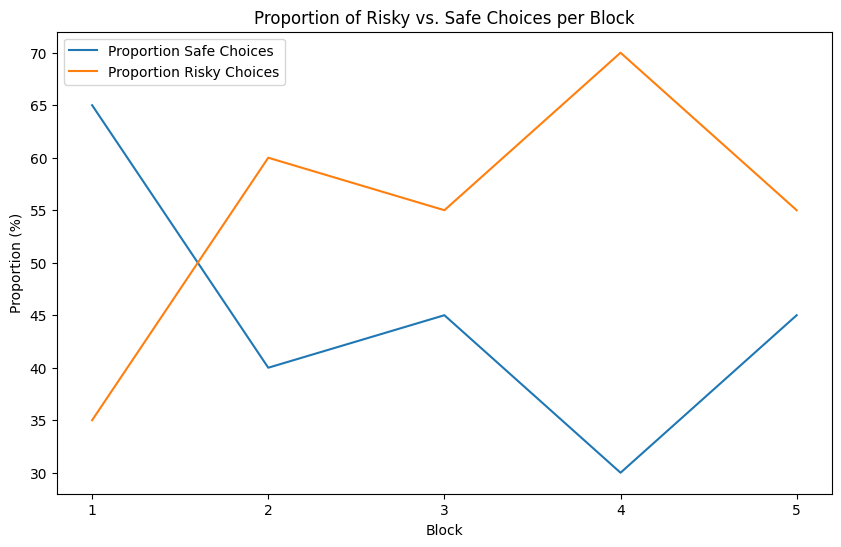

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# load data
data = pd.read_csv("experiment_data.csv")

def plot_deck_choices(data, block_size = 20):
    # some analysis parameters
    num_blocks = len(data.index) // block_size

    # Create a new column 'block' by dividing 'trial_index' by 25 and rounding up to create blocks
    data['block'] = (data['trial_index']) // block_size + 1

    # Group the DataFrame by 'block' and 'risky_deck', and calculate the proportions
    block_proportions = data.groupby(['block', 'type'])['type'].count() / block_size

    # Convert the Series to a DataFrame and drop the 'risky_deck' column
    proportion_safe = list()

    # compute proportion safe choices per block
    for i in range(num_blocks):
      condition = (data['block'] == i + 1) & (data['type'] == 'safe')
      proportion_safe.append(condition.sum())

    # arrange data
    proportion_safe = np.array(proportion_safe)/block_size
    proportion_risky = 1 - proportion_safe
    blocks = np.arange(1, num_blocks+1)

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(blocks, proportion_safe * 100, label='Proportion Safe Choices')
    plt.plot(blocks, proportion_risky * 100, label='Proportion Risky Choices')

    # Customize the plot
    plt.xlabel('Block')
    plt.ylabel('Proportion (%)')
    plt.title('Proportion of Risky vs. Safe Choices per Block')
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plot_deck_choices(data)


The analysis above divides all 100 trials into five blocks of 20 trials. For each block (x-axis), we compute the proportion of choices where you selected one of the safe decks (either B or C; blue line) and the proportion of choices where you selected one of the risky decks (either A or D; orange line). Both some up to 100%.

### <font color="red">**Exercise 2 (1 point):**
Briefly describe what you observe from the plot above. Comment on how the proportion of safe choices changes over time.</font>

YOU ANSWER GOES HERE

## Build a model

In this part of the problem set, you will implement a computational model of the Iowa Gambling Task, referred to as the Expectancy-Valence Model (Busemeyer & Stout, 2002, in *Psychological Assessment*).  

The Expectancy-Valence Model (EVM) is a model used to understand how people make decisions in the Iowa Gambling Task and to figure out why some people prefer risky over safe choices in this task. The model is based on three main components of decision-making: **(1) Valence** (how we perceive wins versus losses), **(2) Expectancy** (how we learn our expectation about the decks), and **(3) Choice** (how we decide which deck to pick next). Let's look at each component separately.

### Valence

The EVM model recognizes that the value we think we'll get from a deck may not be the same as what we actually gain. To account for this, the EVM uses something called 'valence,' which is like a special function that considers this difference when we pick a card in the game. Formally, valence is a utility function:

\begin{align}
v_{i,t} = W \text{win}_t + (1-W) \text{loss}_t
\end{align}

where

*   $v_{i,t}$ is the valence of card deck $i$ at trial $t$,  
*   <font color="purple">$0 < W < 1$ is a parameter</font> that regulates how sensitive a person is towards wins,
*   $\text{win}_t$ is the amount of points won on a given trial, and
*   $\text{loss}_t$ is the amount of points lost on a given trial.

For instance, if $W = 0.8$ (biased towards wins) and we just obtained a reward of 5 points on the curren trial $t$ (i.e., $\text{win}_t=5; \text{loss}_t=0$) by choosing Deck A, then the valence amounts to:

\begin{align}
v_{A,t} = 0.8 * 5 + (1-0.8) * 0 = 4
\end{align}

### Expectancy

The second aspect of this model is about how we learn what to expect from choosing a card deck through experience. Once we've figured out the Valence of the chosen deck (how much we liked the outcome of a deck), we use it as part of our overall understanding of that deck. This combination of Valence and what we've learned about the deck forms our Expectancy.

\begin{align}
E_{i,t} = (1 - \alpha) E_{i,t-1} + \alpha * v_{i,t}
\end{align}

where

*   $E_{i,t}$ is the expectancy of card deck $i$ at trial $t$,
*   $E_{i,t-1}$ is the expectancy of card deck $i$ at the previous trial $t-1$,  
*   <font color="purple">$0 < \alpha < 1$  is the weighting parameter</font> which determines the updating rate of the Expectancy (akin to a learning rate), and
*   $v_{i,t}$ is the valence of card deck $i$ at trial $t$ (as computed above).

For example, if we have an update rate of $\alpha = 0.2$, and assume that our expectancy of Deck A on the previous trial was $E_{A,t-1}=0$, and we assume the valence value $v_{A,t} = 4$ above, then our current expectancy of Deck A in the current trial $t$ computes to:

\begin{align}
E_{A,t} = (1 - 0.2) * 0 + 0.2 * 4 = 0.8
\end{align}

### Choice

Lastly, our model needs to decide how to pick the next deck. Here, we will use the softmax function that we know from the lecture, but with a small twist.

\begin{align}
P(D_{i,t+1}) = \frac{e^{E_{i,t} \beta(t)}}{\sum^4_{j=1}{e^{E_{j,t} \beta(t)}}} = \frac{e^{E_{i,t} \beta(t)}}{e^{E_{1,t} \beta(t)} + e^{E_{2,t} \beta(t)} + e^{E_{3,t} \beta(t)} + e^{E_{4,t} \beta(t)}}
\end{align}

where


*   $P(D_{i,t+1})$ is the probability of choosing deck $D_{i,t+1}$ in the next trial,
*   $E_{i,t}$ is the expectancy of that deck,
*   $E_{j,t}$ is the expectancy of any deck, and
*   $\beta(t)$ determines the "softness" of the choice (lower values -> more exploration) and varies across trials $t$.

As the experiment progresses, participants may get a bit fatigued or bored and choices become more random. Alternatively, participants get more motivated as the experiment progress and choices become more deterministic. Changes in the "noisyness" of the choice process are expressed as follows:


\begin{align}
\beta(t) = \left(\frac{t}{10}\right)^c
\end{align}

for trial $t$ where <font color="purple">$c$ is the third parameter</font>, regulating whether whether the decision gets more noisy over time ($c < 0$), stays as noisy ($c = 0$), or gets less noisy over time ($c > 0$). Thus, negative values of c will implement greater exploration with progress on the task by decreasing the sensitivity the Expectancy values and increasing the number of random choices. To avoid numerical instabilities, we will bound $-2 < c < 2$.

### Summary

The Expectancy-Valence Model learnes the expectancy of a deck based on the valence of outcome associated with chosing that deck. It then chooses the decks based on their expectancy. The model has the following <font color="purple">free parameters</font>:

*   $0 < W < 1$ is a parameter that regulates how sensitive a person is towards wins and plays a role in computing the Valence of an outcome,
*   $0 < \alpha < 1$  is the weighting parameter which determines the updating rate of the Expectancy, and
*   $-2 < c < 2$  determines whether choices become more or less noisy over the course of the experiment.





### Implementation


### <font color="red">**Exercise 3 (3 points):**
The following set of functions implements the model. The only problem is that some of the lines of code are missing. These lines are a marked in the code with "``YOUR ANSWER GOES HERE``", and can be found in the following functions: ``compute_valence``, ``compute_expectancy``, and ``compute_expectancy``, and ``compute_choice_probabilities``.  Your task is to complete these lines so that they implement the model outlined above.</font>

**Note:** *To test if your function produces the correct output, you can simply execute the respective code cell. If the result says "Your [function_name] function creates correct outputs!" then your answer is correct.*

#### Valence Function

In [ ]:
def compute_valence(deck_result, W):
  '''
  This function computes the valence as denoted above.

  Input arguments:
    deck_result: The result of the selected deck (in points)
    W: The valence parameter
  '''

  if deck_result > 0:
    win = deck_result
    loss = 0

  else:
    loss = deck_result
    win = 0

  valence = W*win + (1-W)*loss

  return valence

problemset1.test_compute_valence(compute_valence) # DO NOT REMOVE THIS


Your compute_valence function creates correct outputs!


True

#### Expectancy Function

In [ ]:
def compute_expectancy(previous_expectancy, alpha, valence):
  '''
  This function computes the expectancy as denoted above.

  Input arguments:
    previous_expectancy: expectancy of current deck on previous trial
    alpha: update parameter
    valence: valence of current deck on current trial
  '''


  # compute expectancy term
  new_expectancy = (1-alpha)* previous_expectancy + alpha * valence
  return new_expectancy

problemset1.test_compute_expectancy(compute_expectancy) # DO NOT REMOVE THIS


Your compute_expectancy function creates correct outputs!


True

#### Choice Function

In [ ]:
def compute_choice_probabilities(expectancies, trial_number, c):
  '''
  This function computes the choice probabilities for each deck based on the
  current expectancies

  Input arguments:
    expectancies: a list of expectancies for all four decks
    trial_number: number of the current trial
    c: parameter used to compute beta
  '''

  # compute beta
  beta = pow((trial_number+1)/10, c)

  # compute softmaxed choice proabbilities

  choice_probs = np.exp(expectancies*beta)/np.sum(np.exp(expectancies*beta))

  return choice_probs

# no need to change the function below
def compute_choice(expectancies, trial_number, c):
  '''https://colab.research.google.com/drive/1Q7ji0Q-sGBa5xwi1IxBn6JfptMn3Z1Dh#
  This function computes the index of the chosen deck for the next trial

  Input arguments:
    expectancies: a list of expectancies for all four decks
    trial_number: number of the current trial
    c: parameter used to compute beta
  '''

  # compute softmaxed choice proabbilities
  choice_probs = compute_choice_probabilities(expectancies, trial_number, c)

  # compute cumulated sums
  cumulated_choice_probs = np.cumsum(choice_probs)

  # draw random number between 0 and 1
  random_number = random.random()

  # choose deck index depending on choice probabilities
  index = 0

  # Iterate through the cumulative sums to find the first index where the random number exceeds the cumulative sum
  while index < len(cumulated_choice_probs) and random_number > cumulated_choice_probs[index]:
      index += 1

  return index

problemset1.test_compute_choice_probs(compute_choice_probabilities) # DO NOT REMOVE THIS

Your compute_choice_probabilities function creates correct outputs!


True

In addition to the automated checks, you may use the following code to debug your functions:

In [7]:
# parameters
W = 0.5
alpha = 0.1
c = 0

# experiment variables
trial_number = 1
chosen_deck = 3 # counting decks from 0 to 3 (A: 0, B: 1, C: 2, D: 3)
deck_result = 50

expectancies = np.zeros(4)

valence = compute_valence(deck_result, W)
print("Valence = " + str(valence))

expectancies[chosen_deck] = compute_expectancy(expectancies[chosen_deck], alpha, valence)
print("Expectancy = " + str(expectancies[chosen_deck]))

choice_probs = compute_choice_probabilities(expectancies, trial_number, c)
print("Choice probabilities = " + str(choice_probs))

choice = compute_choice(expectancies, trial_number, c)
print("Chosen deck = " + str(choice))

Valence = 25.0
Expectancy = 2.5
Choice probabilities = [0.06586533 0.06586533 0.06586533 0.80240401]
Chosen deck = 2


## Simulate data from the model

As a next step, we will use the implementation of the model above to simulate data from it.

To simulate data, we need to define our task environment. Let's assume the following wins and losses for our decks:

**Wins / Losses**
*   Deck A: 10 / -25
*   Deck B: 5 / -5
*   Deck C: 5 / -5
*   Deck D: 10 / -25


As you may notice, Decks A and D are the risky decks. While they yield greater rewards compared to B and C, they also yield much greater losses.

Here, we assume that wins occur with 50% probability and losses also with 50% probability. This means, Decks A and D have an expected value of $0.5 * 10 + 0.5 (-25) = -7.5$. Decks B and C, on the other hand, have an expected value of $0.5 * 5 + 0.5 (-5) = 0$.


In the following code, we will define two helper functions.
*   ``observe_deck_result`` function allows us to draw an outcome given the wins, losses, and respective probabilities for any given trial.
*   ``log_data`` function allows us to log all outcomes of a simulation into a dataframe.

Make sure to execute the next code cell. There is no need to dig into the code of the functions.

In [8]:
def observe_deck_result(wins, losses, win_probability, choice):
  '''
  This function returns the outcome of choosing a deck.

  Input arguments:
    wins: wins for Decks A, B, C, and D
    losses: losses for Decks A, B, C, and D
    win_probability: chance of obtaining a win from a deck
    choice: the index of the chosen deck (0: A, 1: B, 2: C, 3: D)
  '''
  random_number = random.random()
  if random_number <= win_probability:
    return wins[choice]
  else:
    return losses[choice]


def log_data(df, trial_number, expectancies, choice, wins, losses, deck_result):
  '''
  This function logs several outcomes of the simulation into a data frame.

  Input arguments:
    df: a Pandas dataframe in which we write the data
    trial_index: current trial number
    expectancies: expectancies of all decks
    choice: the index of the chosen deck (0: A, 1: B, 2: C, 3: D)
    wins: wins for Decks A, B, C, and D
    losses: losses for Decks A, B, C, and D
    deck_result: the value obtained from choosing the deck
  '''
  if wins[choice] == np.min(wins):
    type = "safe"
  else:
    type = "risky"

  new_row = pd.DataFrame({'trial_index': trial_number,
             'E(A)': expectancies[0],
             'E(B)': expectancies[1],
             'E(C)': expectancies[2],
             'E(D)': expectancies[3],
             'choice_index': choice,
             'type': type,
             'reward': wins[choice],
             'penalty': losses[choice],
             'value': deck_result}, index=[0])

  df = pd.concat([df, new_row], axis=0, ignore_index=True)
  return df

Next, we can simulate data from our model. This is will use the simulated data later on to examine how well we can recover the model from the data in principle. However, first we need to write a simulation function...

### <font color="red">**Exercise 4 (2 points):**
Use the function below to simulate 100 trials from the model. Most of the function is already written but you need to fill in a couple lines. The gaps in the code are a marked in the code with "``YOUR ANSWER GOES HERE``".</font>

**Note:** *To test if your function produces the correct output, you can simply execute the respective code cell. If the result says "Your [function_name] function creates correct outputs!" then your answer is correct.*

In [9]:
def simulate_model(num_trials, wins, losses, win_probability, W, alpha, c):
  '''
  This function simulates the expectancy valence model for a certain number of trials.
  It returns a dataframe with simulation results.

  Input arguments:
    wins: wins for Decks A, B, C, and D
    losses: losses for Decks A, B, C, and D
    win_probability: chance of obtaining a win from a deck
    W: the valence parameter
    alpha: the update parameter
    c: parameter used to compute the softmax parameter beta
  '''
  # initialize the model

  expectancies = np.zeros(4)

  # we will log the entire simulation in a dataframe
  df = pd.DataFrame(columns=['trial_index', 'E(A)', 'E(B)', 'E(C)', 'E(D)','choice_index', 'type', 'value'])

  for trial_number in range(num_trials):

    # make a choice
    chosen_deck_index = problemset1.compute_choice(expectancies, trial_number, c)

    #observe deck result to get the deck result of chosen deck index
    deck_result = observe_deck_result(wins, losses, win_probability, chosen_deck_index)

    #compute new valence
    valence = compute_valence(deck_result, W)

    # compute new expectancy
    expectancies[chosen_deck_index] = compute_expectancy(expectancies[chosen_deck_index], alpha, valence)


    # Hint: You may use the functions observe_deck_result, compute_valence, and compute_expectancy
    # If your compute_valence and compute_expectancy don't pass the tests above, then you may use
    # the problemset1.compute_valence and problemset1.compute_expectancy functions instead (they have
    # the same inputs and outputs).

    # log results
    df = log_data(df, trial_number, expectancies, chosen_deck_index, wins, losses, deck_result)

  return df

problemset1.test_simulate_model(simulate_model)

Your simulate_model function creates correct outputs!


True

Now it is time to examine the behavior of the model and get an intuition for its parameters.

### <font color="red">**Exercise 5 (4 points):**
Execute the code block below (exercise instruction are continued below).</font>

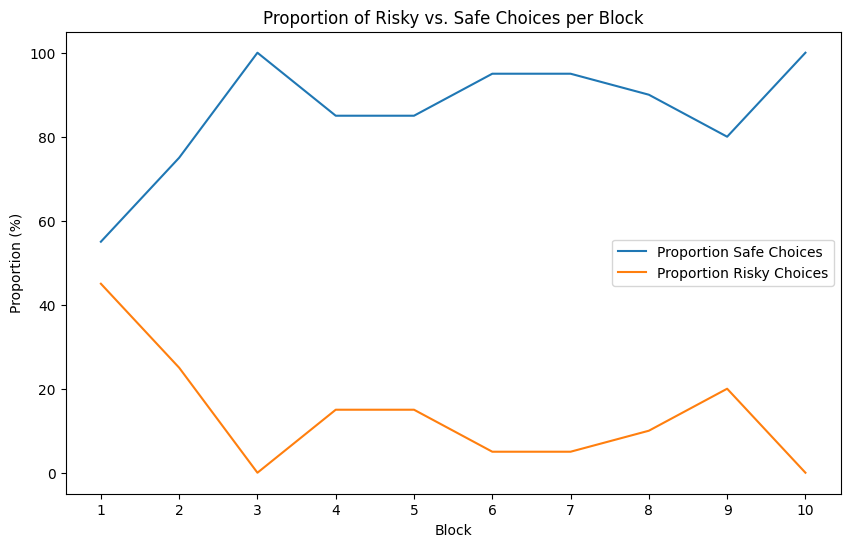

In [10]:
# experiment parameters
wins = [10, 5, 5, 10] # wins for Decks A, B, C, and D
losses = [-25, -5, -5, -25] # losses for Decks A, B, C, and D
win_probability = 0.5 # chance of obtaining a win from a deck
num_trials = 200

# model parameters (default: W = 0.5; alpha = 0.1; c = 0)
W = 0.5
alpha = 0.1
c = 0

random.seed(1) # DO NOT REMOVE THIS LINE
df = problemset1.simulate_model(num_trials, wins, losses, win_probability, W, alpha, c)
plot_deck_choices(df)


<font color="red">Examine the impact of the parameters alpha and W by executing the code block above.</font>

<font color="red">**(1)** **What happens** if you change the alpha from ``alpha = 0.1`` to ``alpha = 0.001`` (assuming ``W = 0.5`` and ``c = 0``) **and why**? (2 points) </font>

<font color="red">**(2)** **What happens** if you change the W from ``W = 0.5`` to ``W = 0.99`` (assuming ``alpha = 0.1`` and ``c = 0``) **and why**? (2 points) </font>

<font color="red">Enter your answers in the text box below.</font>

**Note:** *To make observations easier, we increased the number of trials from 100 to 200.*

YOUR ANSWER GOES HERE.

## Fit model to data

Now that we have gained some understanding of the model, it is time to think about how we can fit the model to the data. Fitting the model is useful for at least two reasons: (1) We can fit the model to its own data to examine how well we can recover its parameters, and (2) we can fit the model to the actual experiment data.

### <font color="red">**Exercise 6 (2 points):**
To fit the model, we will use the maximum likelihood method. This involves identifying the parameters that maximize the log likelihood of the data given the parameters. The function below computes the log likelihood for a given dataset. And as you may have already guessed, there are gaps in the code. This gaps are marked with "``YOUR ANSWER GOES HERE``". Your task is to fill in the gaps.</font>

**Note:** *To test if your function produces the correct output, you can simply execute the respective code cell. If the result says "Your [function_name] function creates correct outputs!" then your answer is correct.*

In [44]:
def compute_log_likelihood(df, W, alpha, c):
  '''
  This function computes the log likelihood for a given set of model parameters

  Input arguments:
    df: data frame
    W: the valence parameter
    alpha: the update parameter
    c: parameter used to compute the softmax parameter beta
  '''
  # initialize log likelihood
  LL = 0

  # initialize the model
  expectancies = np.zeros(4)

  num_trials = len(df)

  for trial_number in range(num_trials):
    # when computing the likelihood, we observe the choice from the data
    chosen_deck_index = df['choice_index'][trial_number]


    choice_probs = compute_choice_probabilities(expectancies, trial_number, c)

    LL += np.log(choice_probs[chosen_deck_index])
    deck_result = df['value'][trial_number]

    # compute valence
    valence = problemset1.compute_valence(deck_result, W)

    # update expectancy of chosen deck
    expectancies[chosen_deck_index] = problemset1.compute_expectancy(expectancies[chosen_deck_index], alpha, valence)

  return LL

problemset1.test_compute_log_likelihood(compute_log_likelihood)

Your compute_log_likelihood function creates correct outputs!


True

### Interpreting the log-likelihood surface

Before we fit the model to experimental data (and draw rash conclusions about the fitted parameters), we want to examien whether we can actually recover the model parameters reliably. To do so, we can first simulate data from the model given some fixed parameters ``true_W = 0.5; true_alpha = 0.1; c = 0``. We call this simulated data "surrogate" data since as it will help us evaluate the parameter recoverability.

Once we generated the surrogate data, we can fit the model to the data. This involves computing the log likelihood for every parameter combination. To ease interpretation, we assume that we already know the correct parameter for ``alpha`` and focus on fitting only the ``W`` and ``c`` parameters. That is, we are looking for a combination of ``W`` and ``c`` that maximizes the log likelihood of the data given the model. Here, we consider a search space of $-0.5 < c < 0.5$ and $-0.2 < W < 0.8$.

The code block below computes the log likelihood for each parameter information and then plots the log likelihood across the entire search space (for each probed ``c`` and ``W``). Execute the code block below.


Text(0, 0.5, 'c')

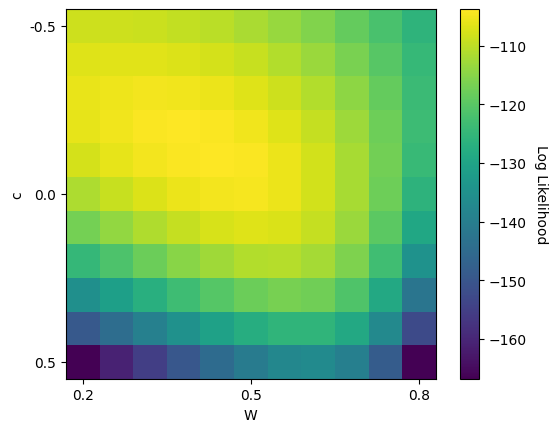

In [45]:
# experiment parameters
wins = [10, 5, 5, 10] # wins for Decks A, B, C, and D
losses = [-25, -5, -5, -25] # losses for Decks A, B, C, and D
win_probability = 0.5 # chance of obtaining a win from a deck
num_trials = 100

# model parameters
true_W = 0.5
true_alpha = 0.1
true_c = 0

# search space over parameters c and W (alpha is assumed to be known)
c_values = np.linspace(-0.5, 0.5, 11)
W_values = np.linspace(0.2, 0.8, 11)
alpha = true_alpha

# obtain surrogate data by simulating the model
df = problemset1.simulate_model(num_trials, wins, losses, win_probability,
                    true_W, true_alpha, true_c)

# we will store our log likelihoods in this matrix
LL_matrix = np.zeros((len(c_values), len(W_values)))

# loop through each parameter combination (grid search)
for c_idx, c in enumerate(c_values):
  for W_idx, W in enumerate(W_values):

    # compute log likelihood
    LL = compute_log_likelihood(df, W, alpha, c)

    # store log likelihood in the data matrix
    LL_matrix[c_idx, W_idx] = LL

# Create a heatmap of the data matrix
plt.imshow(LL_matrix, cmap='viridis')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('Log Likelihood', rotation=270, labelpad=15)

# Set custom tick labels for the X and Y axes
x_ticks = W_values
y_ticks = c_values
visible_ticks_x = [x_ticks[0], x_ticks[len(x_ticks) // 2], x_ticks[-1]]
visible_ticks_y = [y_ticks[0], y_ticks[len(y_ticks) // 2], y_ticks[-1]]

# Set the positions and labels for the visible ticks
plt.xticks([0, len(x_ticks) // 2, len(x_ticks) - 1], visible_ticks_x)
plt.yticks([0, len(y_ticks) // 2, len(y_ticks) - 1], visible_ticks_y)

# Add labels to the axes
plt.xlabel('W')
plt.ylabel('c')

### <font color="red">**Exercise 7 (4 points):**
Execute the code block above. </font>

<font color="red">**(1)** If the parameters were perfectly recoverable, where in this surface (for which c and which W) would you expect the highest log likelihood?  (1 point) </font>

<font color="red">**(2)** Execute the code block multiple times. You will observe that the likelihood surface changes every time you execute the code block. Why does it change and where does this variability come from? (1 point) What does this variability tell you about your ability to recover model parameters for your own data? (1 point)</font>

<font color="red">**(3)** Execute the code block multiple times. Based on the likelihood surface, what can you infer about the relationship between the two parameters c and W in terms of their impact on the model's behavior? (1 point)</font>

<font color="red">Enter your answers in the text box below.</font>

YOUR ANSWER GOES HERE

### Examining parameter recoverability

To examine parameter recoverability, we can initialize many instances of the model (with randomly sampled <font color="green">true parameters</font>) and then generate surrogate data from each. We can then fit the model to each surrogate data set in order to obtain the <font color="blue">recovered parameters</font>. Doing so, allows us to compute the Pearson correlation between the <font color="green">true parameters</font> and the <font color="blue">recovered parameters</font>. Execute the code block below to obtain these correlations.

**Note:** *Here, we seek to recover all three parameters: ``c``, ``W``, and ``alpha``.*

Completed run 0 of 20
Completed run 1 of 20
Completed run 2 of 20
Completed run 3 of 20
Completed run 4 of 20
Completed run 5 of 20
Completed run 6 of 20
Completed run 7 of 20
Completed run 8 of 20
Completed run 9 of 20
Completed run 10 of 20
Completed run 11 of 20
Completed run 12 of 20
Completed run 13 of 20
Completed run 14 of 20
Completed run 15 of 20
Completed run 16 of 20
Completed run 17 of 20
Completed run 18 of 20
Completed run 19 of 20
Pearson correlation coefficient for c: 0.5787860081063402
Pearson correlation coefficient for W: 0.8535987393563242
Pearson correlation coefficient for alpha: 0.7999468505117757


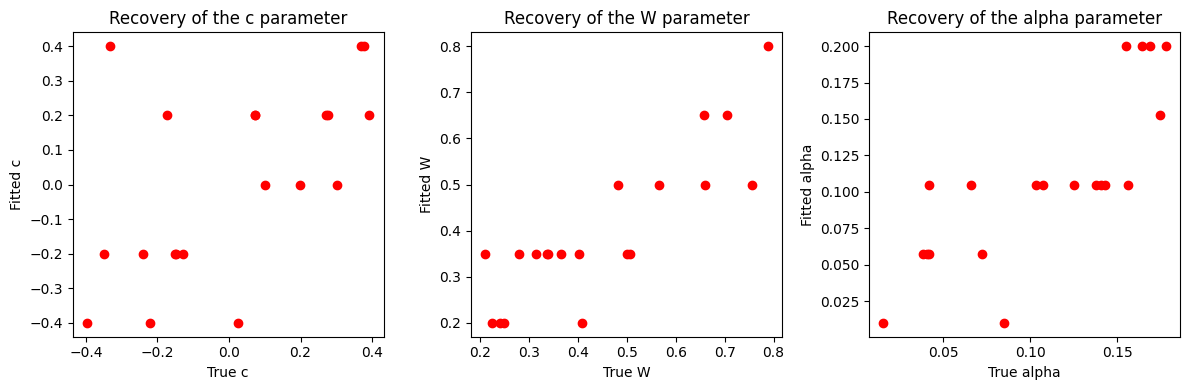

In [46]:
random.seed(1) # DON'T REMOVE THIS LINE

# experiment parameters
wins = [10, 5, 5, 10] # wins for Decks A, B, C, and D
losses = [-25, -5, -5, -25] # losses for Decks A, B, C, and D
win_probability = 0.5 # chance of obtaining a win from a deck
num_trials = 100

# the number of true values we seek to simulate
num_true_values = 20

# range of simulated and tested values for c
min_c = -0.4
max_c = 0.4

# range of simulated and tested values for W
min_W = 0.2
max_W = 0.8

# range of simulated and tested values for alpha
min_alpha = 0.01
max_alpha = 0.2

# determine range of parameters for fitting
c_values = np.linspace(min_c, max_c, 5)
W_values = np.linspace(min_W, max_W, 5)
alpha_values = np.linspace(min_alpha, max_alpha, 5)

# create some arrays for logging
true_W_log = np.zeros(num_true_values)
true_c_log = np.zeros(num_true_values)
true_alpha_log = np.zeros(num_true_values)

fitted_W_log = np.zeros(num_true_values)
fitted_c_log = np.zeros(num_true_values)
fitted_alpha_log = np.zeros(num_true_values)

# for each run, we will simulate data with randomly sampled parameters and
# then attempt to fit those data.
for run in range(num_true_values):
  print("Completed run " + str(run) + " of " + str(num_true_values))

  # randomly sample model parameters from which to sample surrogate data
  true_W = random.uniform(min_W, max_W)
  true_c = random.uniform(min_c, max_c)
  true_alpha = random.uniform(min_alpha, max_alpha)

  # log those parameters
  true_W_log[run] = true_W
  true_c_log[run] = true_c
  true_alpha_log[run] = true_alpha

  # simulate surrogate data
  df = problemset1.simulate_model(num_trials, wins, losses, win_probability,
                      true_W, true_alpha, true_c)

  # initialize the simulation with a very low LL (indicating bad fit)
  # and some initial parameters
  best_LL = -10000
  best_c = 0
  best_W = 0
  best_alpha = 0

  # loop through each parameter combination (grid search)
  for c_idx, c in enumerate(c_values):
    for W_idx, W in enumerate(W_values):
      for alpha_idx, alpha in enumerate(alpha_values):

        # compute log likelihood
        LL = problemset1.compute_log_likelihood(df, W, alpha, c)

        # store log likelihood if it is higher than the previous one
        if LL > best_LL:
          best_c = c
          best_W = W
          best_alpha = alpha
          best_LL = LL

  # store the parameter combination yielding the highest log likelihood
  fitted_W_log[run] = best_W
  fitted_c_log[run] = best_c
  fitted_alpha_log[run] = best_alpha


# Create subplots with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))  # Adjust the figsize as needed

# Create the first scatter plot on the left
ax1.scatter(true_c_log, fitted_c_log, marker='o', color='red')
ax1.set_xlabel('True c')
ax1.set_ylabel('Fitted c')
ax1.set_title('Recovery of the c parameter')

# Create the second scatter plot on the right
ax2.scatter(true_W_log, fitted_W_log, marker='o', color='red')
ax2.set_xlabel('True W')
ax2.set_ylabel('Fitted W')
ax2.set_title('Recovery of the W parameter')

# Create the second scatter plot on the right
ax3.scatter(true_alpha_log, fitted_alpha_log, marker='o', color='red')
ax3.set_xlabel('True alpha')
ax3.set_ylabel('Fitted alpha')
ax3.set_title('Recovery of the alpha parameter')

# Adjust spacing between subplots
plt.tight_layout()

# Compute the Pearson correlation coefficient for c
correlation_matrix = np.corrcoef(true_c_log, fitted_c_log)
# The correlation coefficient is at (0, 1) in the correlation matrix
correlation = correlation_matrix[0, 1]
print(f"Pearson correlation coefficient for c: {correlation}")

# Compute the Pearson correlation coefficient for W
correlation_matrix = np.corrcoef(true_W_log, fitted_W_log)
# The correlation coefficient is at (0, 1) in the correlation matrix
correlation = correlation_matrix[0, 1]
print(f"Pearson correlation coefficient for W: {correlation}")

# Compute the Pearson correlation coefficient for alpha
correlation_matrix = np.corrcoef(true_alpha_log, fitted_alpha_log)
# The correlation coefficient is at (0, 1) in the correlation matrix
correlation = correlation_matrix[0, 1]
print(f"Pearson correlation coefficient for alpha: {correlation}")



### <font color="red">**Exercise 8 (3 points):**
Execute the code block above. </font>

<font color="red">**(1)** Based on the results you obtain from the above code block, rank the parameters based on their recoverability, from top (best recoverability) to bottom (worst recoverability). Make sure that ``num_trials = 100``. (1 point) </font>

<font color="red">**(2)** In the code block above, change ``num_trials = 100`` to ``num_trials = 200``. What do you observe (1 point) and what does this tell you about the choice of the optimal number of trials for the experiment? (1 point)</font>

<font color="red">Enter your answers in the text box below.</font>

(1)The order of the bigger values of Pearson correlation coefficient, respectively W, alpha, and c
(2)The bigger number of trials for the experiemnt deliver the better parameters based on their recoverability in c, W, and alpha.

### Fitting the model to your behavior

After learning about your ability to fit the model, the moment has finally come: You will get to fit the model to you own behavior.

### <font color="red">**Exercise 9 (1 bonus point):**
Complete the code block below (see "``YOUR CODE ANSWER GOES HERE``) to the model to your own behavior. You may draw from the code examples from the previous exercises. Given what you have learned from the previous exercises, how do you interpret these results (see "``YOUR TEXT ANSWER GOES HERE``)?</font>

**Note:** *The bonus point is only given if you manage to correctly fit the model to your data while offering a valid interpretation of the results.*

In [47]:
# load data
data = pd.read_csv(io.BytesIO(uploaded['experiment_data.csv']))

# range of simulated and tested values for c
min_c = -1
max_c = 1

# range of simulated and tested values for W
min_W = 0.1
max_W = 0.9

# range of simulated and tested values for alpha
min_alpha = 0.01
max_alpha = 0.1



# parameter search space resolution
resolution = 20

# generate parameter search space
c_values = np.linspace(min_c, max_c, resolution)
W_values = np.linspace(min_W, max_W, resolution)
alpha_values = np.linspace(min_alpha, max_alpha, resolution)

# initialize log-likelihood and fitted parameters
best_LL = -float('inf')
best_c = 0
best_W = 0
best_alpha = 0

# simulate the model with current parameter values
#simulated_data = simulate_model(len(data), wins, losses, win_probability, W, alpha, c)

# iterate through parameter combinations
for c in c_values:
    for W in W_values:
        for alpha in alpha_values:

            # compute log-likelihood
            LL = compute_log_likelihood(data, W, alpha, c)

            # update best parameters if current log-likelihood is higher
            if LL > best_LL:
                best_LL = LL
                best_c = c
                best_W = W
                best_alpha = alpha

print("Fitted c: " + str(best_c))
print("Fitted W: " + str(best_W))
print("Fitted alpha: " + str(best_alpha))



Fitted c: -1.0
Fitted W: 0.9
Fitted alpha: 0.03368421052631579


YOUR TEXT ANSWER GOES HERE

If you are using grid search, you may execute the following code block to check your solution (the execution may take a while).

In [49]:
problemset1.test_parameter_fit(data, c_values, W_values, alpha_values, best_LL, best_c, best_W, best_alpha)

Your compute_log_likelihood function creates correct outputs!


True

## Bonus: Peform a model comparison

As a bonus exercise, you can consider implementing an alternative model. Can the alternative model explain the data better than the model above? You may use any criterion (e.g., BIC) to guide your decision.

In [ ]:
# YOUR CODE GOES HERE